In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Íris

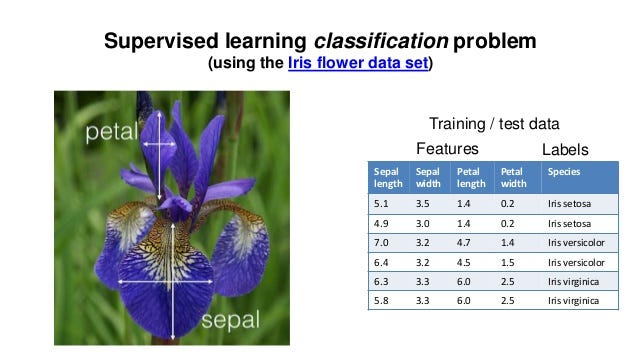

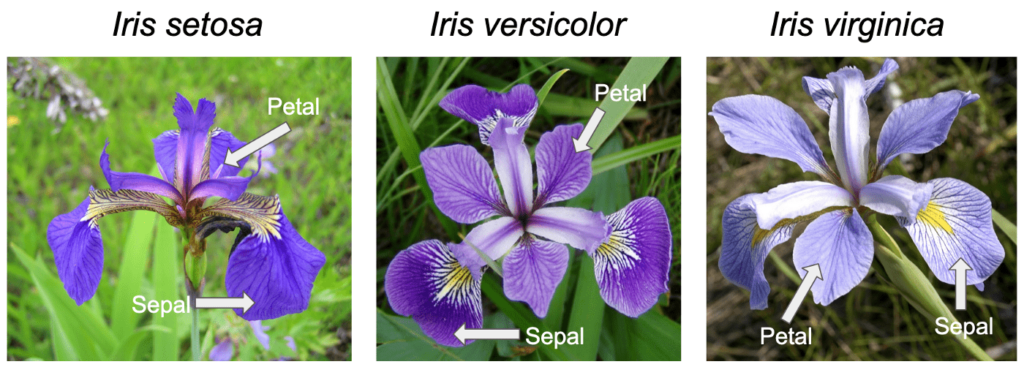

### 1 - Carregar o dataset iris e dividir em duas variáveis.
 - x = Features (características das flores)
 - y = Target (0, 1 ou 2, respectivamente referente a Setosa, Versicolor e Virginica)

In [2]:
# Prepare the data data
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
# Criando um Dataframe para visualizar a tabela de dados
x_df = pd.DataFrame(x, columns=load_iris()['feature_names'])
y_df = pd.DataFrame(y, columns=['Target'])
y_label = y_df.replace([0,1,2],['setosa', 'versicolor', 'virginica'])
iris_df = pd.concat((x_df,y_label), axis=1)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
print('Exibir o Shape (formato) da nossa variável x, ou seja, o tamanho da matriz')
x.shape

Exibir o Shape (formato) da nossa variável x, ou seja, o tamanho da matriz


(150, 4)

#### Como temos 4 variáveis no nosso dataset, não conseguimos visualizar em apenas um plot 2D. Portanto, vamos fazer plotagens de pares de vaviáveis para ver como elas se separam no espaço

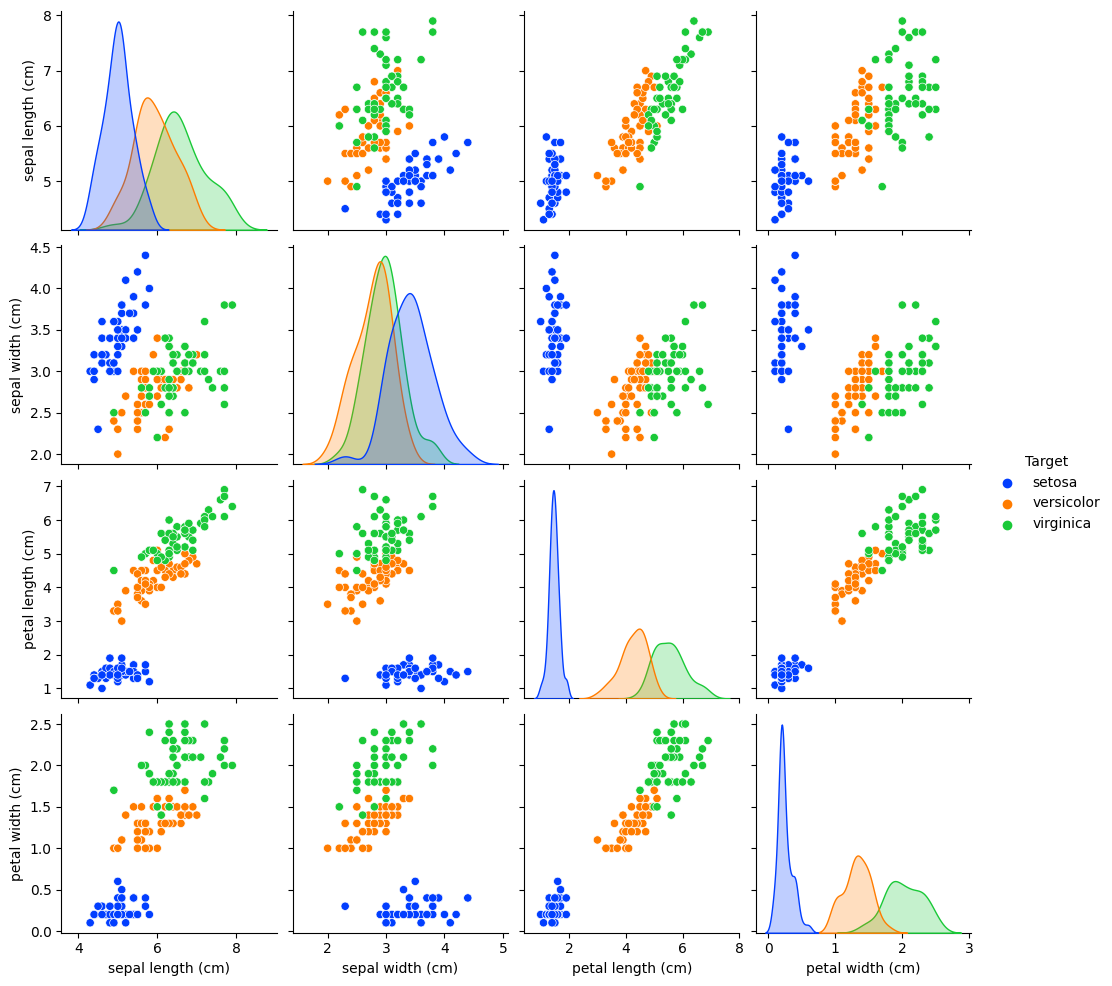

In [5]:
sns.pairplot(iris_df, hue='Target', palette='bright');

## Separando o dataset em Treino e Teste

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

## Implantando um classificador KNN

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model =  DecisionTreeClassifier(criterion='entropy',
                                max_depth=3,
                               min_samples_split=3,
                               min_samples_leaf=2)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

## Avaliando métricas do modelo

In [12]:
from sklearn.metrics import accuracy_score

print("Acurácia na base de teste: ", accuracy_score(y_test, y_test_pred))

Acurácia na base de teste:  0.9777777777777777


## Visualizando a árvore

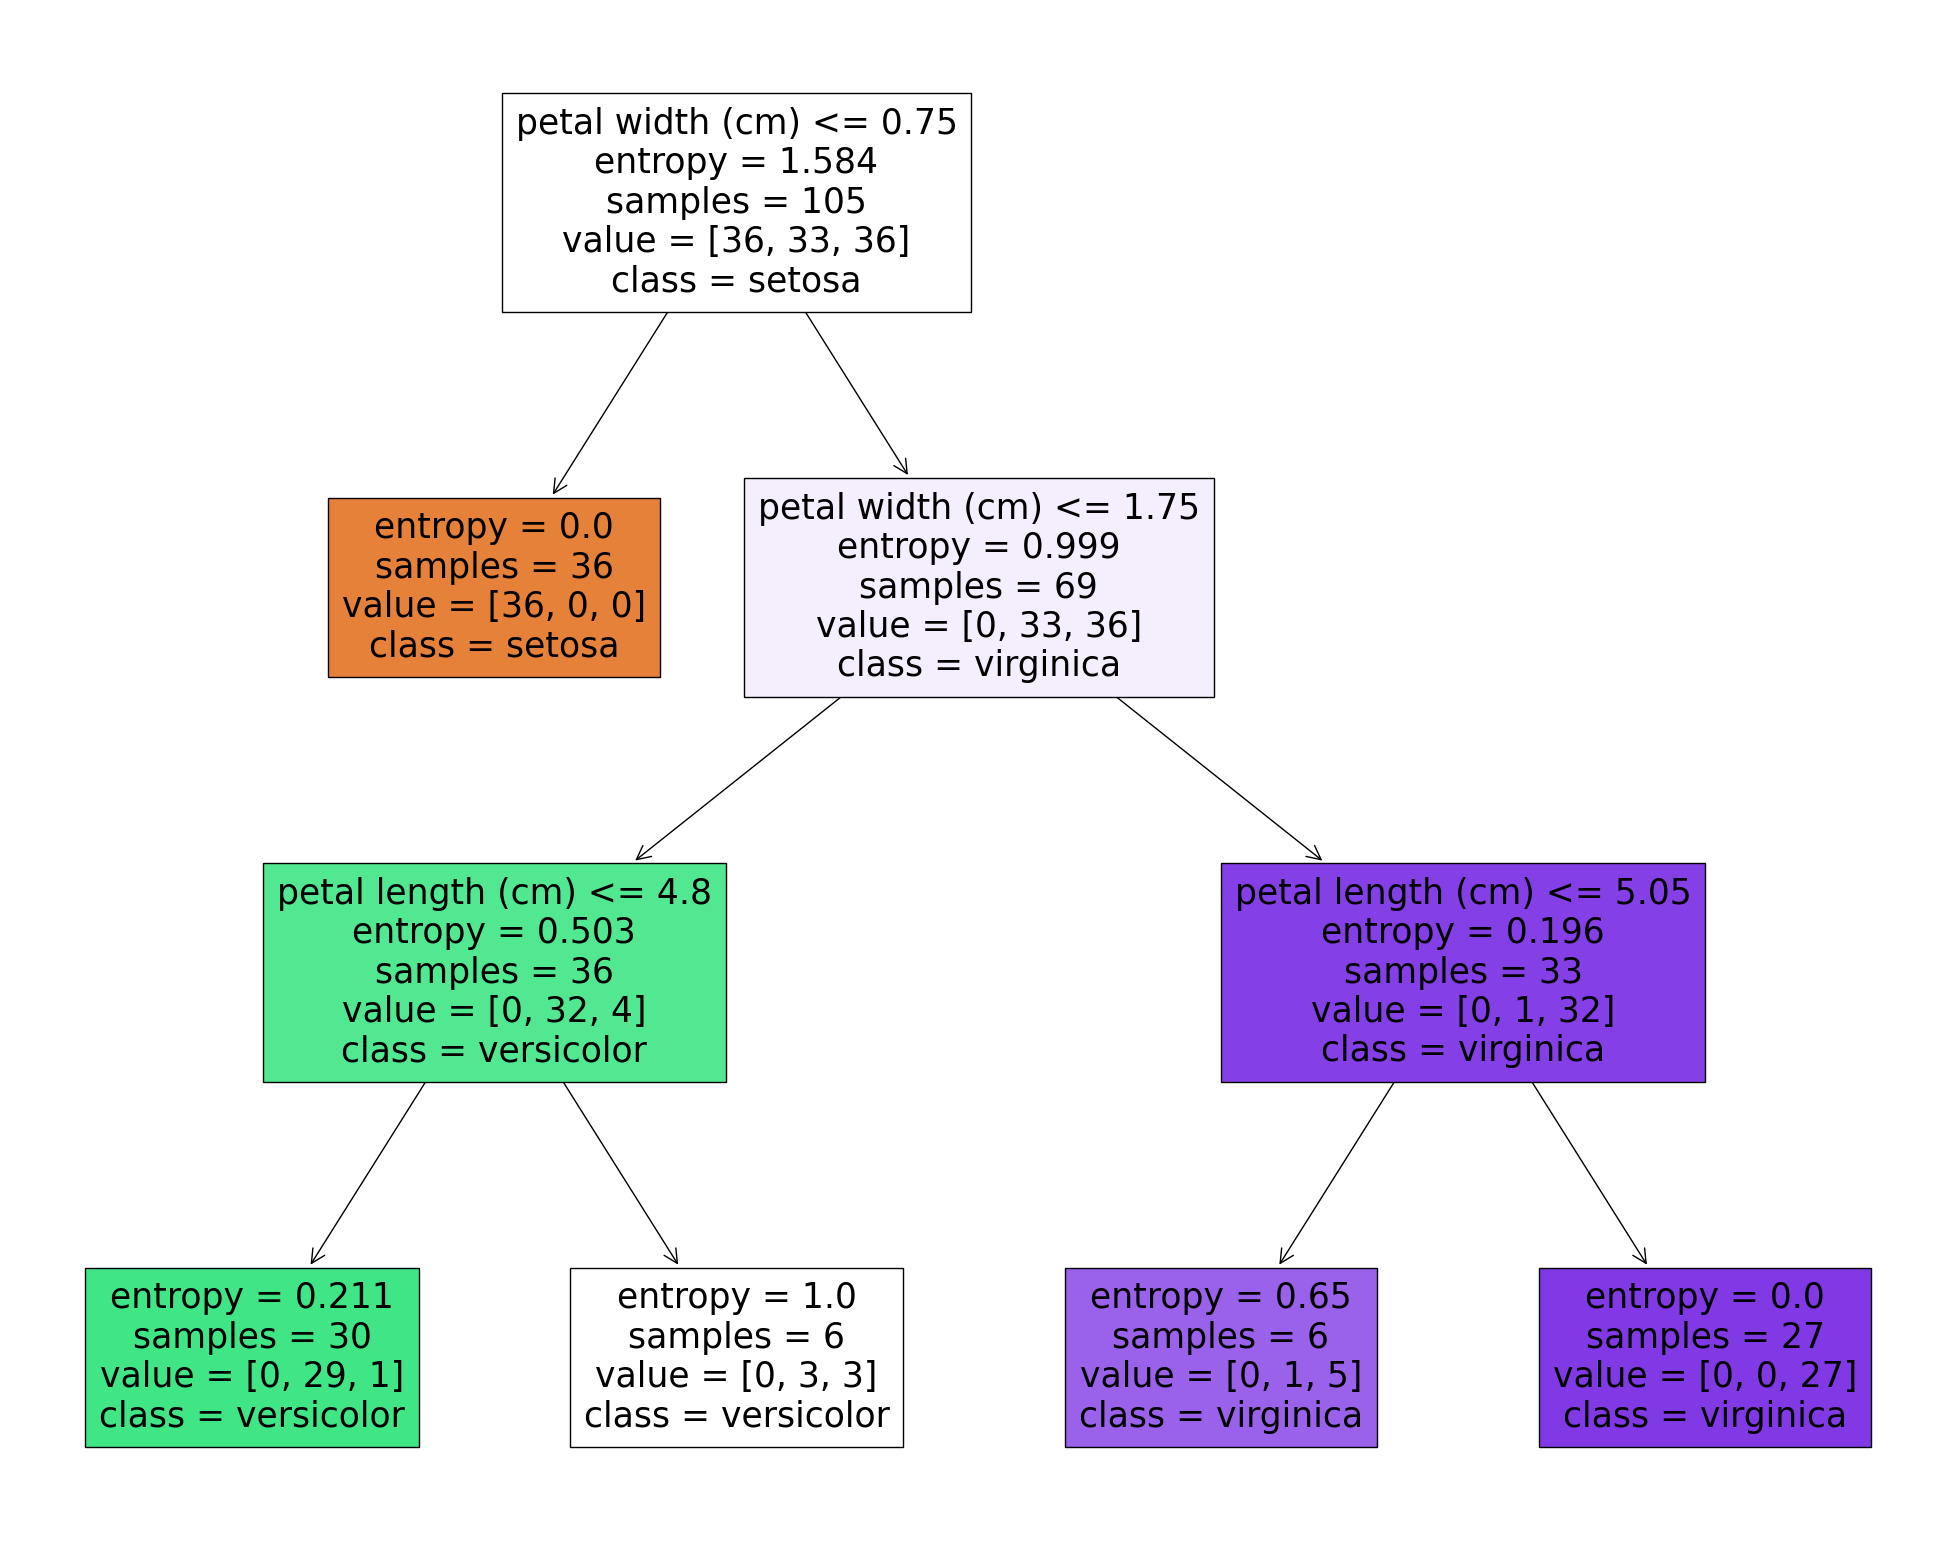

In [13]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names.tolist(),
                   filled=True)